# TensorFlow: Intro
- TensorFlow is a ML library developed by Google
- It runs not only in CPUs but as well in GPUs and TPUs
- That allow us to create fairly complicated models with a litle coding
- TensorFlow has apeculiar underlying logic: requires a extra eforce to understand it.

**What is a Tensor?**

Tensor is a data structure categorized by the number of ranks.
Tensors can be represented as n-dimensional arrays.
- scalar: rank = 0
- array : rank = 1
- matrix: rank = 2
- tensor: rank = n (generalization of the concepts: sclaar, array and matrix )

TensorFlow is an open source library for numerical computation using data flow graphs. 
- Nodes in the grpah rerpesent mathematical operations
- Edges represents the multidimensional data arrays (Tensors) communicated between them. (see more looking for TensorBard)

## Import the relevant libraries

In [19]:
## TODO: We need to update the code to TensorFlow v2.2.0

In [7]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generate_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(low=-1, high=1, size=(observations,1))
generated_targets = 2*xs - 3*zs +5 + noise

# Save data in a tensor format that can be used by TensorFlow. 
# The data is saved in .npz format.
np.savez('TF_intro', inputs= generate_inputs, targets=generated_targets)

## Solving with TensorFlow

In [4]:
input_size = 2 # two variables
output_size = 1 # one output

Each object we create using the tf library would do nothing unless explicitly told to. It rather describes the logic of the algorithm.

## Outlining the mode

- Defining Tensorflow objects
- Using the **tf.placeholder**: it is where we feed the data. The data that is contained in our dataset it goes into placeholder
- We will use the npz to feed the data into the model through placeholder

**Note:** tf.placefolder doesn't preserves their values across iterations

We initiaize weights and biases using anotther TensorFlow object: **tf.Variable**.

**Note:** tf.Variable doesn't preserve their values across iterations

In resume:
- Feed data -> tf.placeholder
- Vary -> tf.Variable

$x w + b = t -> targets$

- $x$: n x k  -> n: total of records/obervations ; k: total of variables
- $w$: k x m  ->  k: total of variables; m: total of outputs  
- $b$: 1 x m 
- $y$: n x m


In [8]:
# None means that we need not to specify the dimension
#inputs = tf.placeholder(tf.float32,[None,input_size])
inputs = tf.compat.v1.placeholder(tf.float32,[None,input_size])
targets = tf.compat.v1.placeholder(tf.float32,[None,output_size])
#targets = tf.placeholder(tf.float32,[None, output_size])

weights = tf.Variable(tf.random.uniform([input_size,output_size], 
                                        minval=-0.1, maxval=0.1))

biases = tf.Variable(tf.random.uniform([output_size], 
                                        minval=-0.1, maxval=0.1))

# x.w + b = y 
outputs = tf.matmul(inputs,weights) + biases  

## Chossing the objective function and the optimization model method

- Objective / Loss Function : l2-norm / observations /2 -> mean_loss
- Optimize Method : Gradient Descent


In [13]:
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

## Prepare for execution

- `tf.InteractiveSession()`: it is used whenever we want to execute something, anything
- In TensorFlow the training happens in sessions. When we use `tf.IteractiveSession()` we actually say: "It's time to execute"


In [9]:
sess = tf.InteractiveSession()

## Initializing Variabels

- `tf.global_variables_initializer()`: it is the method that initializes all tensor objects "market" as variables
- In our case we have weights and biases

In [11]:
initializer =tf.global_variables_initializer()

# It is used whenever for executing something, anything
sess.run(initializer)

## Loading Training data

In [12]:
training_data = np.load('TF_intro.npz')

## Learning

- Epoch: it is the name attributed for an interation over the full dataset 
- feed_dict: thells the algortihm how the data is going to be fed. 
    - It receives a dictionary: {placeholder1: data, placeholer2:data
    - Remember: `training_data` is loading our dataset. When we saved dataset in the file *TF_intor.npz* it received two labels (inputs and targets):
        - `inputs = generate_inputs`) 
        - `targets = generated_targets`)
        
This process can be understood as:
   - Run the optimize and mean_loss operations by filling the placeholder objects with data specified in the feed_dict parameter
   
curr_loss method return something for optimze and mean_loss:
   - optimize always is None. For this reason we disregard this value and we don't need this value.
   - mean_loss has always a value
   
**Note:** Iterating over the data is not so easy if we want amazing results

In [14]:
for e in range(100):
    # curr_loss = current loss
    _, curr_loss = sess.run([optimize, mean_loss],
                           feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    print(curr_loss)

243.92793
131.32521
77.89317
50.04766
34.15654
24.376396
18.00898
13.693863
10.68223
8.530016
6.9590087
5.7883563
4.897653
4.2055006
3.6562486
3.2115135
2.8445883
2.5367134
2.2745655
2.0485723
1.8517393
1.6788831
1.5260808
1.3903064
1.269177
1.1607808
1.063548
0.97617245
0.89754766
0.826724
0.76287824
0.70528734
0.65331674
0.60640174
0.5640404
0.52578324
0.49122807
0.46001264
0.43181252
0.40633404
0.38331482
0.3625157
0.34372258
0.32674164
0.3113977
0.2975331
0.28500476
0.2736839
0.26345414
0.25421056
0.24585788
0.23831013
0.23148985
0.22532678
0.21975777
0.21472546
0.21017794
0.20606887
0.20235567
0.19900037
0.19596857
0.19322869
0.19075304
0.18851587
0.18649428
0.18466754
0.18301696
0.18152536
0.18017755
0.17895956
0.17785901
0.17686443
0.17596574
0.17515366
0.17441991
0.17375682
0.17315768
0.17261621
0.17212695
0.1716849
0.17128535
0.17092437
0.17059812
0.1703034
0.17003705
0.16979632
0.16957882
0.16938229
0.16920468
0.16904415
0.16889913
0.16876812
0.16864969
0.16854271
0.168446
0.

## Plotting the data

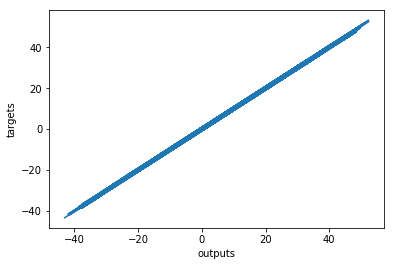

In [15]:
out =  sess.run([outputs],
               feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['targets']) )
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()